# Week 4 Quiz

## Clarissa - rt2822

### Due Tuesday Oct 4th 11:59pm ET

### Instructions

Replace the Name and UNI in cell above and the notebook filename

Replace all '____' below using the instructions provided.

When completed, 
 1. make sure you've replaced Name and UNI in the first cell and filename
 2. Kernel -> Restart & Run All to run all cells in order 
 3. Print Preview -> Print (Landscape Layout) -> Save to pdf 
 4. post pdf to GradeScope

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In this quiz we'll calculate a 95% confidence interval for the mean value of 'flavanoids' from the wine dataset.

In [2]:
# Read in ../data/wine_dataset.csv as df
df = pd.read_csv("../data/wine_dataset.csv")

# print .info() on df for a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

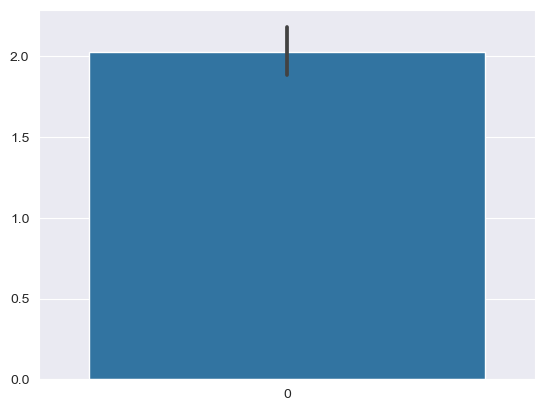

In [3]:
# Generate a barplot of the 'flavenoids' column with 95% confidence intervals using sns.barplot()
# These are the CI values we're going to calculate below.
# Capture the axis of the plot in ax
ax = sns.barplot(df.flavanoids)

In [4]:
# Assign the mean value of flavanoids to variable observed_mean
observed_mean = df.flavanoids.mean()

# Print the observed mean with a precision of 2
observed_mean.round(2)

2.03

In [5]:
# generate a bootstrap sample of df.flavanoids (with the same number of values as the original dataset)
#   using .sample() (with replacement) 
#   using random_state=0 so our answers will match
#   assign the result to sample
sample = df.flavanoids.sample(n = df.shape[0], replace = True, random_state=0)

# Print the mean of the sample with a precision of 2
# Note: if the sample mean is the same as the observed mean, 
#       check: are you sampling with replacement?
sample.mean().round(2)

2.16

In [6]:
# Generate 1000 additional sample means using bootstrap sampling from the 'flavanoids' column
#   each sample should have the same number of values as the original dataframe
#   sample with replacement
#   do not use random_state for this step (your results may differ from the course solution slightly)
#   store in the list sample_means
sample_means = [df.flavanoids.sample(n = df.shape[0], replace = True).mean() for i in range(1000)]

# Print the first 5 values in sample_means
sample_means[:5]

[2.0769662921348315,
 2.0498876404494384,
 1.9907303370786518,
 2.0649438202247192,
 2.1284831460674156]

<AxesSubplot: ylabel='Count'>

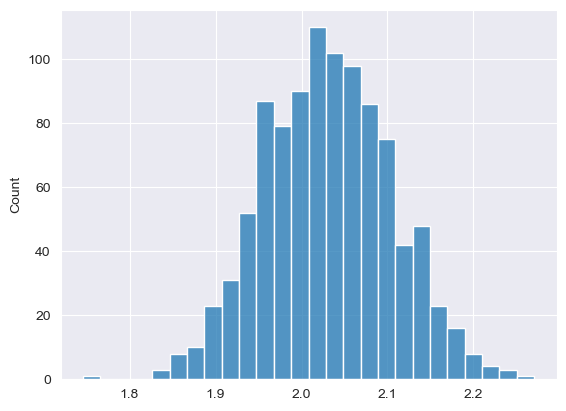

In [7]:
# Plot the distribution of sample means using sns.histplot()
sns.histplot(sample_means)

In [8]:
# To get the 95% confidence interval, we want to retain the central 95% of our sample_means.
# To do this we need to first determine how many values must be trimmed from the ends of the sorted array.
# For 95% CI, we want to trim 1/2 of 5% from each end.
# Calculate 2.5% of the length of sample_means and store as trim_amount.
trim_amount = len(sample_means)*0.025

# print the trim_amount, the number of elements we'll trim from each end of the sorted list
trim_amount

25.0

In [9]:
# We want to index into our sample_means, but trim_amount is a float.
# Use np.round() to round and int() to convert to int and store the result in trim_idx.
trim_idx = int(np.round(trim_amount,0))

# Print trim_idx
trim_idx

25

In [10]:
# We can now print the 95% CI for our measure by indexing into the sorted array of sample_means.
# Use np.sort() to return a sorted numpy array 
#   then use a list of the indices we want, [trim_idx,-trim_idx-1], to use "fancy indexing" on this sorted array.
# Store the 95% CI values as ci
ci = np.sort(sample_means)[[trim_idx,-trim_idx-1]]

# Print the ci values and visually compare the endpoints of the CI in the barplot above.
ci

array([1.88949438, 2.1747191 ])